### <span style='color : orange'> Project - IMDB Movie Rating Analysis </span>

This project focuses on analyzing a movie ratings dataset, combining movie details, ratings, and tags.

Source: https://www.kaggle.com/code/harunshimanto/pandas-with-data-science-ai

In [260]:
import numpy as np
import pandas as pd

In [14]:
ratings = pd.read_csv(r'C:\Users\Siris\Practice Files Python\Movie data\rating.csv')

In [15]:
ratings.shape

(20000263, 4)

In [18]:
tags = pd.read_csv(r'C:\Users\Siris\Practice Files Python\Movie data\tag.csv')

In [20]:
tags.shape

(465564, 4)

In [22]:
movies = pd.read_csv(r'C:\Users\Siris\Practice Files Python\Movie data\movie.csv')

In [26]:
movies.shape

(27278, 3)

In [30]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [33]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [35]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [37]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [39]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [43]:
# For current analysis, we will remove timestamp
del ratings['timestamp']
del tags['timestamp']

In [45]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [47]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [49]:
row_0 = tags.iloc[0] # Data structure - Series
type(row_0)

pandas.core.series.Series

In [51]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [53]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [55]:
row_0['userId']

18

In [57]:
'rating'in row_0

False

In [59]:
row_0.name

0

In [65]:
row_0 = row_0.rename('firstRow') # the name of row_0 is updated to 'firstRow', and the second line retrieves that updated name.
row_0.name

'firstRow'

In [67]:
tags.head() # using DataFrames from here

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [69]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [71]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [73]:
tags.iloc[[0,10,500]] # iloc is used for integer-based indexing, meaning you are selecting by position rather than label.


,userId,movieId,tag
0,18,4141,Mark Waters
10,65,1694,jesus
500,342,55908,entirely dialogue


In [77]:
ratings['rating'].describe() # Descriptive Statistics on how the ratings are distributed

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [79]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [81]:
ratings['rating'].mean()

3.5255285642993797

In [83]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [85]:
ratings['rating'].min()

0.5

In [87]:
ratings['rating'].max()

5.0

In [89]:
ratings['rating'].std()

1.051988919275684

In [93]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [97]:
filter1 = ratings['rating']>10 # filter1 is a Series of boolean values that represent whether each rating is greater than 10.
print(filter1)
filter1.any() # checks if there is at least one True value in the Series, meaning there is at least one rating greater than 10.

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [101]:
filter2 = ratings['rating'] > 0 # filter2 is a boolean mask indicating which ratings are greater than 0
filter2.all() # checks if every rating in the 'rating' column is greater than 0.

True

In [103]:
movies.shape

(27278, 3)

In [105]:
movies.isnull().any().any()

# isnull() creates a DataFrame where True indicates missing values.
# any() (first) checks if any values in each column are True (missing values).
# any() (second) checks if any column has at least one True value, meaning it contains missing values.
# The final result (True or False) tells you if there are any missing values in the entire DataFrame.

False

In [107]:
ratings.shape

(20000263, 3)

In [109]:
ratings.isnull().any().any() # 'False' means no null values

False

In [111]:
tags.shape

(465564, 3)

In [113]:
tags.isnull().any().any() # 'True' means there are some null values

True

In [115]:
tags = tags.dropna() # Removes null values

In [117]:
tags.isnull().any().any() # 'False' means no null values

False

In [119]:
tags.shape # number of rows have reduced after removing null values

(465548, 3)

In [121]:
%matplotlib inline

import matplotlib.pyplot as plt

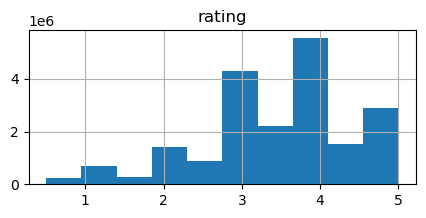

In [137]:
# The output will be a histogram with the 'rating' column's values, plotted on the x-axis, and the frequency of these ratings (or the count of each unique rating) on the y-axis.

ratings.hist(column='rating',figsize = (5,2))
plt.show()

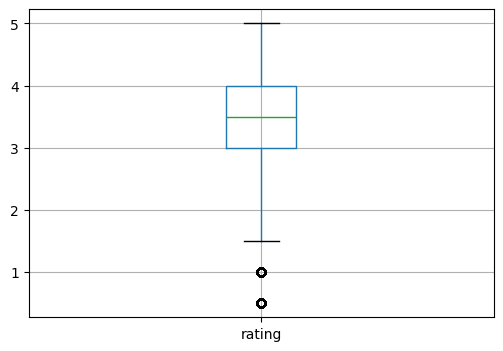

In [149]:
ratings.boxplot(column='rating',figsize = (6,4))
plt.show()

# A box from Q1 (25th percentile) to Q3 (75th percentile), with the median represented as a line inside the box.
# Whiskers extending from the box to the minimum and maximum values (not including outliers).
# Outliers (if any) will be shown as individual points outside the whiskers.

In [152]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [156]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [162]:
ratings[-10:] # selects and returns the last 10 rows of the ratings DataFrame

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [182]:
tag_counts = tags['tag'].value_counts() # counts how many times each unique tag appears in the 'tag' column
tag_counts[-10:] # slices the last 10 items of the tags_counts Series, which corresponds to the least frequent tags (if there are at least 10 unique tags).

tag
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: count, dtype: int64

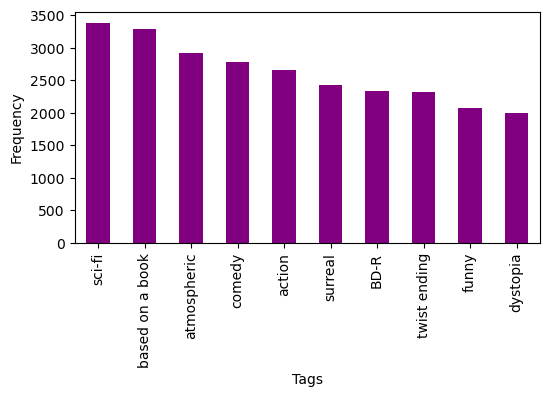

In [220]:
tag_counts = tags['tag'].value_counts() # Get the frequency count of each tag
# Define custom colors for each bar
tag_counts[:10].plot(kind='bar', figsize=(6,3), color = 'purple') # creates a bar plot of these top 10 values, making it easier to visualize the distribution of the most common tags.
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# the end #

### Conclusion

In this project, we analyzed a movie ratings dataset by merging movie details, ratings, and tags. We explored the distribution of ratings, identified highly-rated movies, and filtered movies based on specific criteria.

Visualizations such as histograms and boxplots helped in understanding the spread of ratings. Ultimately, this analysis provided good understanding of user preferences and movie popularity based on ratings.